<a href="https://colab.research.google.com/github/Raduchak/Plane-detection/blob/main/Plane_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import json

In [ ]:
! gdown --id 16ZXPGjCl0FJFOXMeUexjZCXc4dOiw1Pl
! mkdir -p data && unzip -q -d data satelite.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16ZXPGjCl0FJFOXMeUexjZCXc4dOiw1Pl
To: /content/satelite.zip
100% 93.4M/93.4M [00:03<00:00, 26.7MB/s]


In [ ]:
path = '/content/data/planesnet/planesnet/'

In [ ]:
from PIL import Image
from tqdm import tqdm
from glob import glob

def create_data(path_name):
    images = [np.zeros([20,20,3])]
    labels = [0]
    for img in tqdm(os.listdir(path_name)):
        if(img[0]=='1'):
            labels.append(1)
        else:
            labels.append(0)
        image = Image.open(os.path.join(path_name,img))
        image = np.array(image)
        images.append(image)

    return np.array(images),np.array(labels)
images, labels = create_data(path)

100%|██████████| 32000/32000 [00:06<00:00, 4985.70it/s]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.20, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25600, 20, 20, 3)
(6401, 20, 20, 3)
(25600,)
(6401,)


In [ ]:
X_train = X_train.astype('float32')
X_train = X_train.reshape(X_train.shape[0],20,20,3)
X_train = X_train / 255.

X_test = X_test.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 20,20,3)
X_test = X_test / 255.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture
model_1 = Sequential()

model_1.add(BatchNormalization(input_shape = (20, 20, 3)))

model_1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (20, 20, 3)))
model_1.add(MaxPooling2D(pool_size = 2))


model_1.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Flatten())

model_1.add(Dense(units = 64,activation = 'relu'))


model_1.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model_1.compile(optimizer=opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 20, 20, 3)         12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 18, 18, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                        

In [ ]:
model = model_1.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_test, y_test),verbose=1)


Epoch 1/30
800/800 [==============================] - 31s 37ms/step - loss: 0.1609 - accuracy: 0.9376 - val_loss: 0.1424 - val_accuracy: 0.9453
Epoch 2/30
800/800 [==============================] - 33s 41ms/step - loss: 0.0875 - accuracy: 0.9684 - val_loss: 0.0809 - val_accuracy: 0.9736
Epoch 3/30
800/800 [==============================] - 20s 25ms/step - loss: 0.0638 - accuracy: 0.9769 - val_loss: 0.0733 - val_accuracy: 0.9736
Epoch 4/30
800/800 [==============================] - 20s 25ms/step - loss: 0.0503 - accuracy: 0.9812 - val_loss: 0.0685 - val_accuracy: 0.9781
Epoch 5/30
800/800 [==============================] - 22s 27ms/step - loss: 0.0405 - accuracy: 0.9862 - val_loss: 0.0622 - val_accuracy: 0.9789
Epoch 6/30
800/800 [==============================] - 22s 27ms/step - loss: 0.0322 - accuracy: 0.9889 - val_loss: 0.0648 - val_accuracy: 0.9786
Epoch 7/30
800/800 [==============================] - 20s 25ms/step - loss: 0.0258 - accuracy: 0.9907 - val_loss: 0.0499 - val_accuracy:

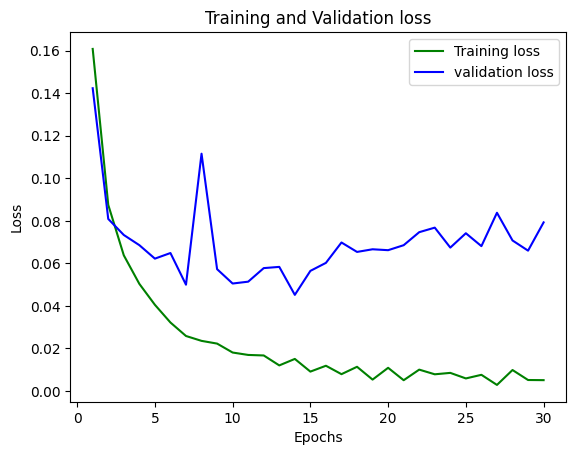

In [ ]:
EPOCH=30
loss_train = model.history['loss']
loss_val = model.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

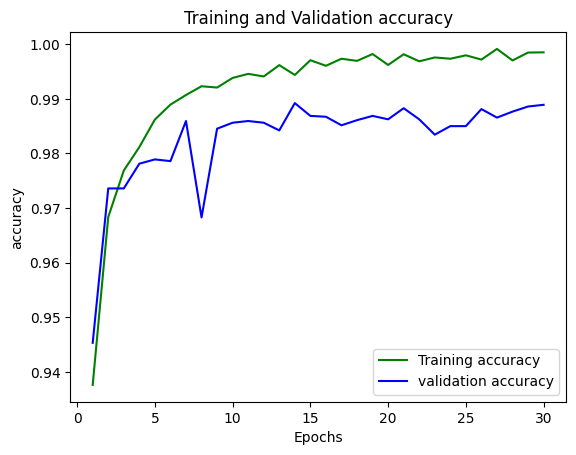

In [ ]:
EPOCH=30
Acc_train = model.history['accuracy']
Acc_val = model.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
score = model_1.evaluate(X_test, y_test, batch_size=100)

65/65 [==============================] - 2s 26ms/step - loss: 0.0793 - accuracy: 0.9889


In [ ]:
model_1.save('content/satelite.h5')

1/1 [==============================] - 0s 20ms/step


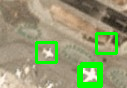

In [ ]:
import cv2
import numpy as np
from tensorflow import keras
from google.colab.patches import cv2_imshow


model = keras.models.load_model('satelite.h5')

image_path = '/content/plane2.jpg'
larger_img = cv2.imread(image_path)

# Rozmiar okna (20x20 pikseli zgodnie z modelem)
window_size = (20, 20)

# Przesuwane okno
for y in range(0, larger_img.shape[0] - window_size[0], 3):
    for x in range(0, larger_img.shape[1] - window_size[1], 3):
            window = larger_img[y:y + window_size[0], x:x + window_size[1]]
            input_window = window / 255.0
            input_window = np.expand_dims(input_window, axis=0)
            prediction = model.predict(input_window)
            if prediction[0, 0] > 0.5:
                cv2.rectangle(larger_img, (x, y), (x + window_size[1], y + window_size[0]), (0, 255, 0), 2)
cv2_imshow( larger_img)
